# Segmentación de Especies con Cluster Analysis


# ***Sección 1: Sépalo***

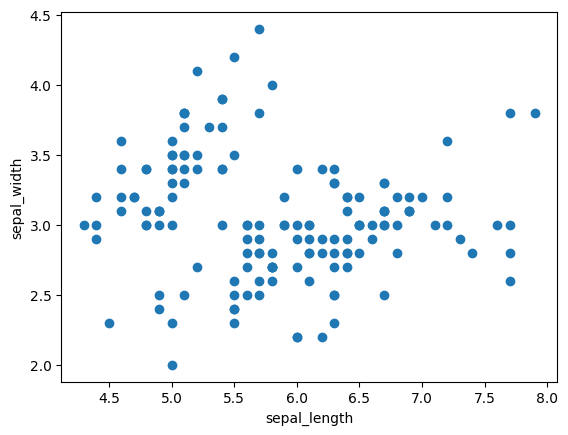

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Read the data

# Visualicen los datos para ver si pueden detectar algunos grupos.

df = pd.read_csv('iris.csv')


plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


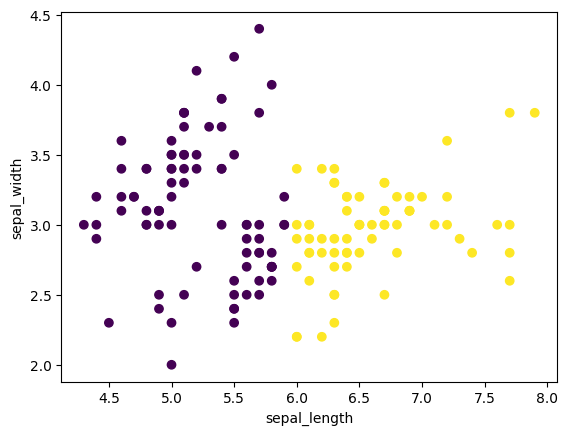

In [3]:
# Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['sepal_length', 'sepal_width']])
labels = kmeans.predict(df[['sepal_length', 'sepal_width']])

plt.scatter(df['sepal_length'], df['sepal_width'], c=labels)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

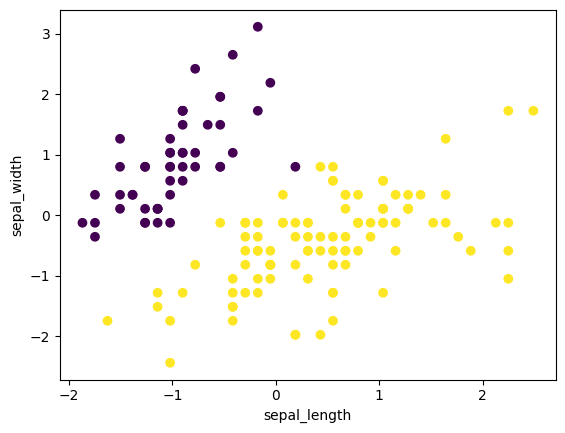

In [4]:
# Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

scaler = StandardScaler()
s_data = scaler.fit_transform(df[['sepal_length', 'sepal_width']])
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(s_data)
labels = kmeans.predict(s_data)

plt.scatter(s_data[:,0], s_data[:,1], c=labels)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()




***- Hay una diferencia entre los grupos previamente creados y los nuevos grupos, debido a que los anteriores parecían haber sido creados mediante una separación vertical, mientras que los nuevos grupos parecen haber sido creados de manera más lógica al estar basados en la cercanía de los puntos. Esto se logró a través de la estandarización de los datos, lo que permitió una mayor claridad en la identificación de los grupos.***

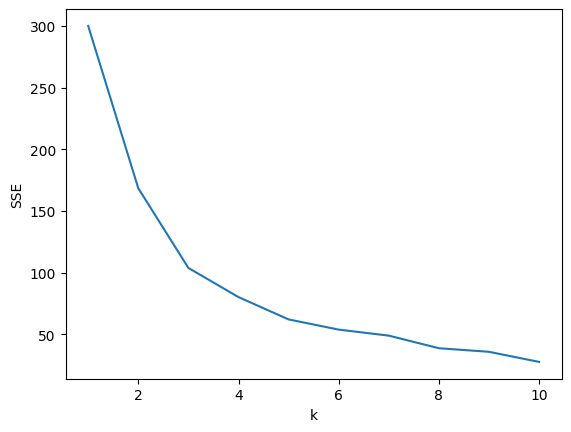

In [5]:
# Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(s_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

***La cantidad de clústers que más coincide con el codo es 4***

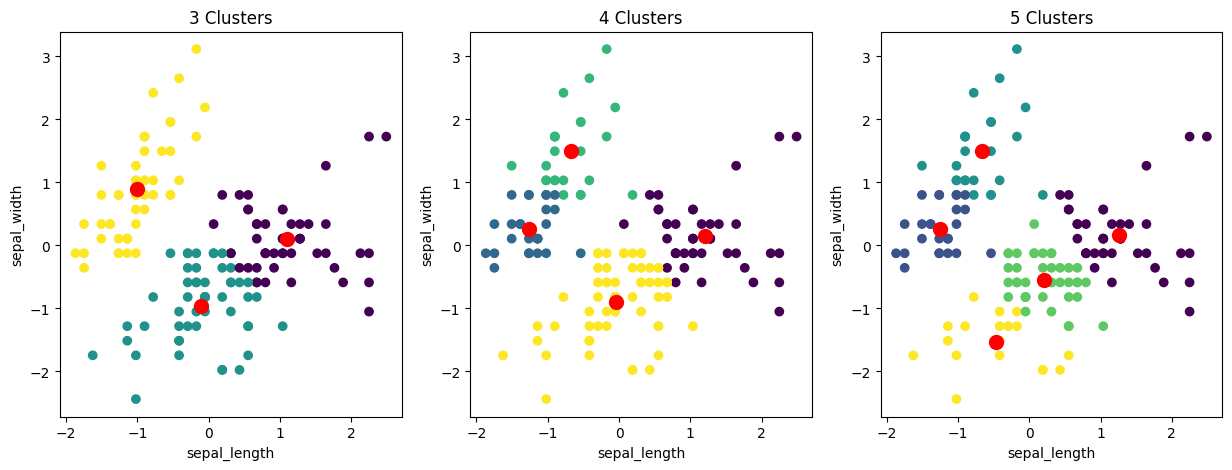

In [6]:
# Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters 
# (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

k_3 = KMeans(n_clusters=3, random_state=42, n_init="auto")
k_3.fit(s_data)

k_4 = KMeans(n_clusters=4, random_state=42, n_init="auto")
k_4.fit(s_data)

k_5 = KMeans(n_clusters=5, random_state=42, n_init="auto")
k_5.fit(s_data)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(s_data[:,0], s_data[:,1], c=k_3.labels_)
ax1.scatter(k_3.cluster_centers_[:,0], k_3.cluster_centers_[:,1], c='red', s=100)
ax1.set_xlabel('sepal_length')
ax1.set_ylabel('sepal_width')
ax1.set_title('3 Clusters')

ax2.scatter(s_data[:,0], s_data[:,1], c=k_4.labels_)
ax2.scatter(k_4.cluster_centers_[:,0], k_4.cluster_centers_[:,1], c='red', s=100)
ax2.set_xlabel('sepal_length')
ax2.set_ylabel('sepal_width')
ax2.set_title('4 Clusters')

ax3.scatter(s_data[:,0], s_data[:,1], c=k_5.labels_)
ax3.scatter(k_5.cluster_centers_[:,0], k_5.cluster_centers_[:,1], c='red', s=100)
ax3.set_xlabel('sepal_length')
ax3.set_ylabel('sepal_width')
ax3.set_title('5 Clusters')

plt.show()


In [7]:
df_real = pd.read_csv('iris-con-respuestas.csv')


df_real.head()

print(df_real['species'].unique())


['setosa' 'versicolor' 'virginica']


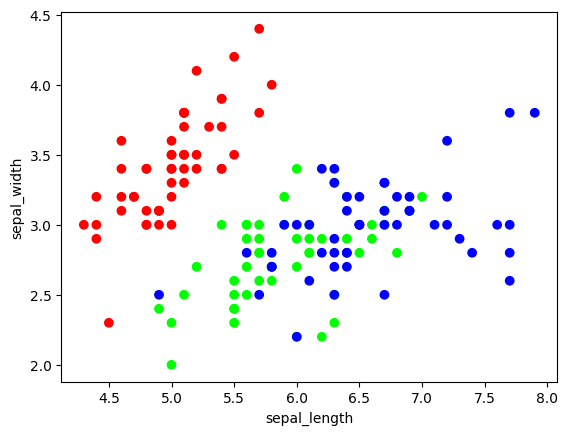

In [8]:
species_colors = {
    'setosa': (1.0, 0.0, 0.0),
    'versicolor': (0.0, 1.0, 0.0),
    'virginica': (0.0, 0.0, 1.0)
}

df_real['color'] = df_real['species'].map(species_colors)

plt.scatter(df_real['sepal_length'], df_real['sepal_width'], c=df_real['color'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

### Erramos en la cantidad de clusters, ya que el codo se encuentra en 4, pero la cantidad de clusters que se crearon es 3 con el archivo de respuesta.

# ***Sección 2: Pétalo***

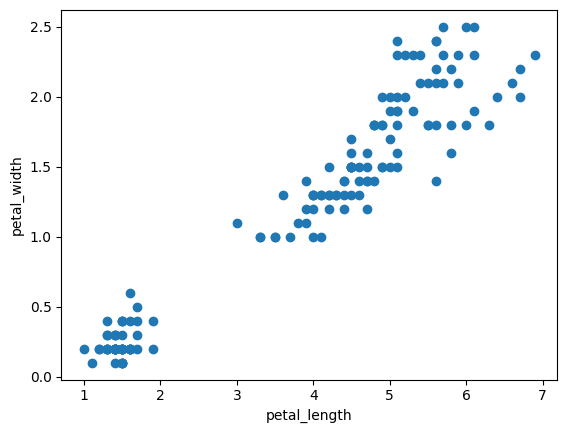

In [9]:
df = pd.read_csv('iris.csv')

plt.scatter(df['petal_length'], df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


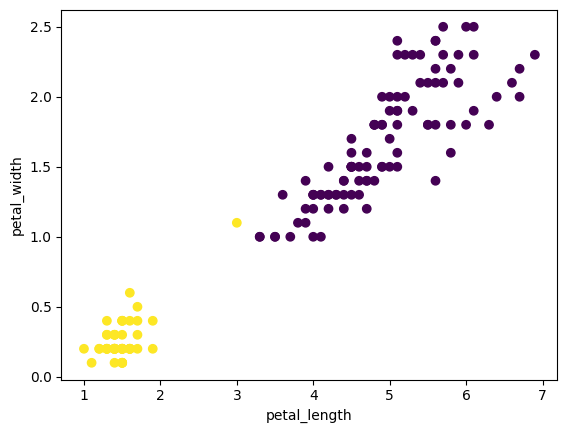

In [10]:
# clusters pétalos kmeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['petal_length', 'petal_width']])
labels = kmeans.predict(df[['petal_length', 'petal_width']])

plt.scatter(df['petal_length'], df['petal_width'], c=labels)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

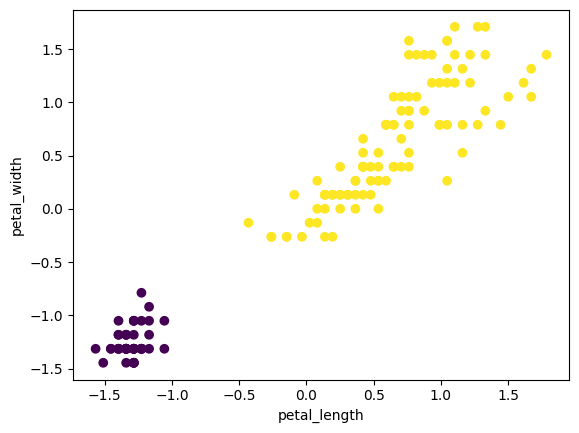

In [11]:
# standarize

s_data = scaler.fit_transform(df[['petal_length', 'petal_width']])
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(s_data)
labels = kmeans.predict(s_data)

plt.scatter(s_data[:,0], s_data[:,1], c=labels)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()


***- Se nota que la diferenciación es mucho más lógica en comparación a la anterior.***

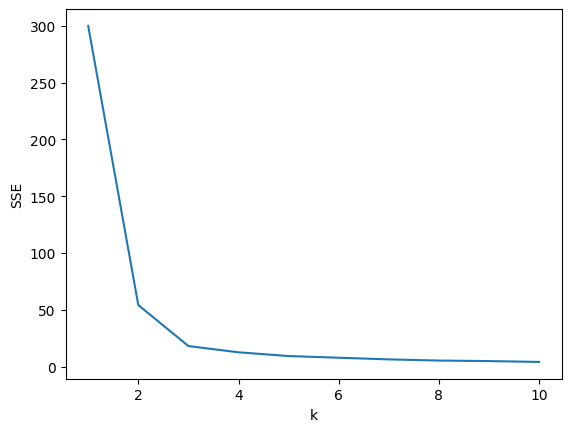

In [12]:
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(s_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

***-El codo se ve entre 2 y 3, por lo que asumimos que se encuentra en 3, debido a que parece ser el valor donde el codo ya es más estable.***

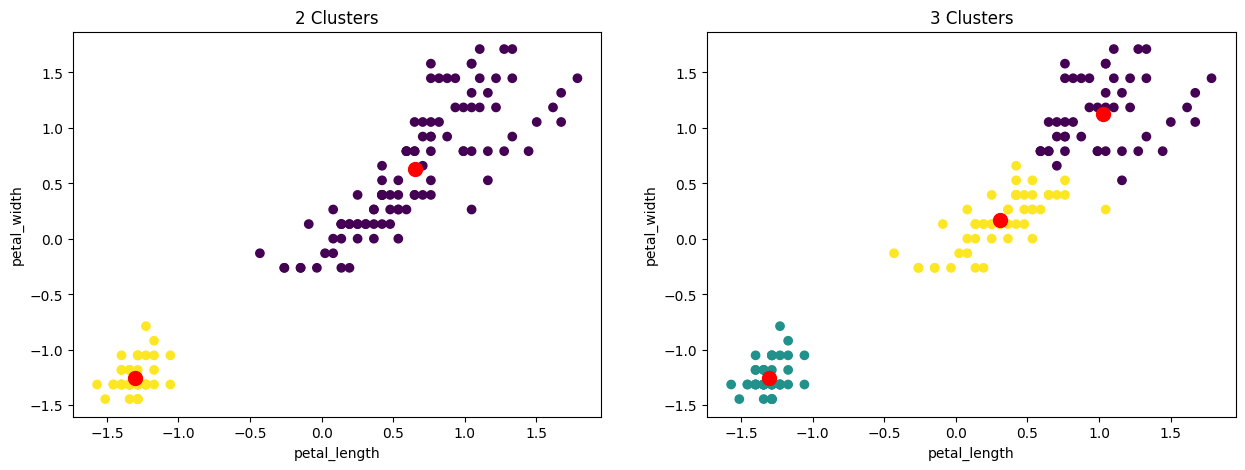

In [13]:
k_2 = KMeans(n_clusters=2, random_state=42, n_init="auto")
k_2.fit(s_data)

k_3 = KMeans(n_clusters=3, random_state=42, n_init="auto")
k_3.fit(s_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(s_data[:,0], s_data[:,1], c=k_2.labels_)
ax1.scatter(k_2.cluster_centers_[:,0], k_2.cluster_centers_[:,1], c='red', s=100)
ax1.set_xlabel('petal_length')
ax1.set_ylabel('petal_width')
ax1.set_title('2 Clusters')

ax2.scatter(s_data[:,0], s_data[:,1], c=k_3.labels_)
ax2.scatter(k_3.cluster_centers_[:,0], k_3.cluster_centers_[:,1], c='red', s=100)
ax2.set_xlabel('petal_length')
ax2.set_ylabel('petal_width')
ax2.set_title('3 Clusters')

plt.show()

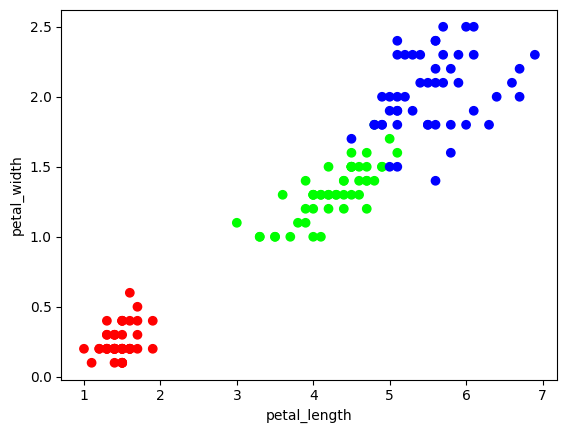

In [14]:
df_real = pd.read_csv('iris-con-respuestas.csv')

species_colors = {
    'setosa': (1.0, 0.0, 0.0),
    'versicolor': (0.0, 1.0, 0.0),
    'virginica': (0.0, 0.0, 1.0)
}

df_real['color'] = df_real['species'].map(species_colors)

plt.scatter(df_real['petal_length'], df_real['petal_width'], c=df_real['color'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()


### Efectivamente, la cantidad de clusters que se crearon es 3, por lo que acertamos en la cantidad de clusters. Esto fue más fácil de identificar en el caso de las dimensiones de los pétalos, ya que la diferencia entre los grupos es más clara, en comparación a la de los sépalos.

# ***Sección 3: Kneed***

In [15]:
from kneed import KneeLocator

c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

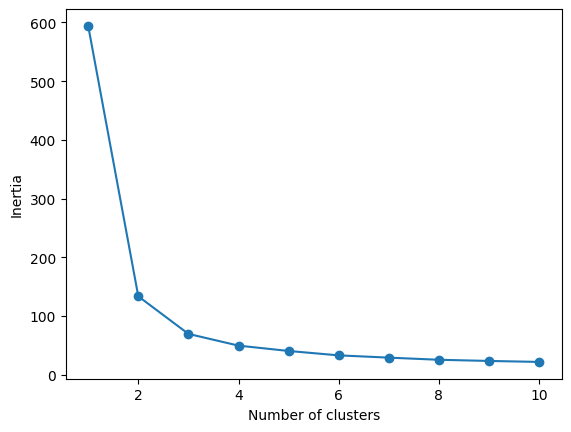

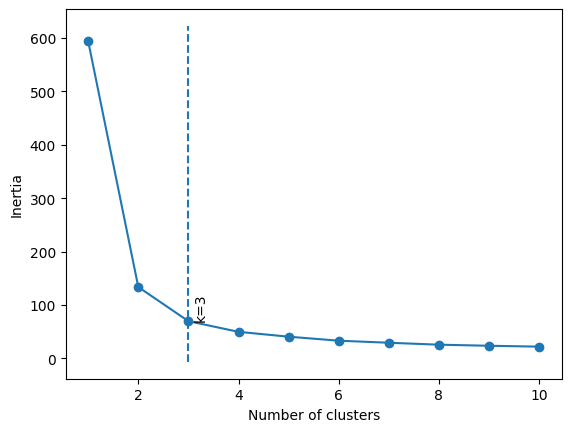

La cantidad óptima de clústers es: 3


In [23]:
df = pd.read_csv('iris.csv')

X = df.iloc[:, :-1]

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kneedle = KneeLocator(range(1, 11), inertias, curve='convex', direction='decreasing')
knee_x = kneedle.elbow
knee_y = inertias[knee_x - 1]

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.vlines(knee_x, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.text(knee_x + 0.1, knee_y + 5, f'k={knee_x}', rotation=90)
plt.show()

print(f'La cantidad óptima de clústers es: {kneedle.elbow}')



***Llegamos a la conclusión que el método de los pétalos fue más certero para llegar a la cantidad correcta de clusters.***